## Model Notebook
---

This notebook fit a baseline model for the prediction. The models are trained on basics features, without any normalization or balancing process.
The hyperparameters are set to default values, and the models is trained on the full dataset.

Models:
- Random Forest
- SVM with a RBF kernel

In [83]:
import os
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# paths the features
FEATURES_DIR = '../features/'
MODELS_DIR = '../models/'

### Load Data

In [76]:
names = os.listdir(FEATURES_DIR)
print(names)
data_list = []
data_list_name = []

for name in names:
     data = np.load(FEATURES_DIR + name)
     X = data['X']
     y = data['y'].reshape(-1, 1)
     filename = data['filename'].reshape(-1, 1)
     data = np.concatenate((X, y), axis=1)
     data_name = np.concatenate((data, filename), axis=1)
     data_list.append(data)
     data_list_name.append(data_name) 
     
# create the full data matrix
data = np.concatenate(data_list, axis=0)
data_name = np.concatenate(data_list_name, axis=0) # data with the index of the filename in the last column

# split the data in testing and training
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

['normals_1_mix.npz', 'artifacts_1_mix.npz', 'extrastoles_1_mix.npz', 'extrahls_1_mix.npz', 'murmurs_1_mix.npz']


### Fit Model

Test report: 
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       373
         1.0       0.00      0.00      0.00        28
         2.0       0.54      0.22      0.32       245
         3.0       0.65      0.88      0.75       449
         4.0       0.00      0.00      0.00        42

    accuracy                           0.70      1137
   macro avg       0.40      0.41      0.38      1137
weighted avg       0.64      0.70      0.65      1137



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


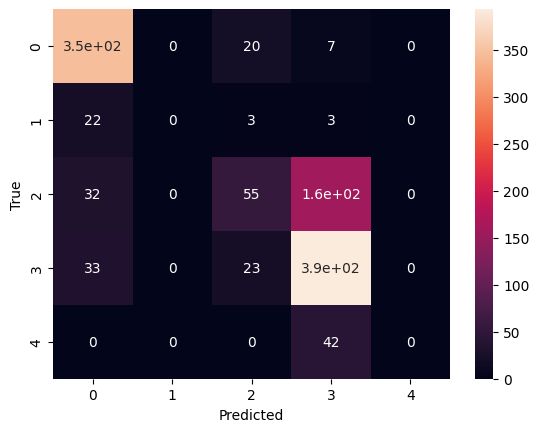

In [87]:
# fit the model
svm = SVC()
svm.fit(X_train, y_train)

# predict the test set
y_pred = svm.predict(X_test)
print(f'Test report: \n{classification_report(y_test, y_pred)}')

# save the model
joblib.dump(svm, MODELS_DIR + 'svm_base.gz')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       373
         1.0       0.86      0.89      0.88        28
         2.0       0.97      0.73      0.84       245
         3.0       0.80      0.98      0.88       449
         4.0       0.75      0.07      0.13        42

    accuracy                           0.89      1137
   macro avg       0.88      0.73      0.74      1137
weighted avg       0.90      0.89      0.88      1137



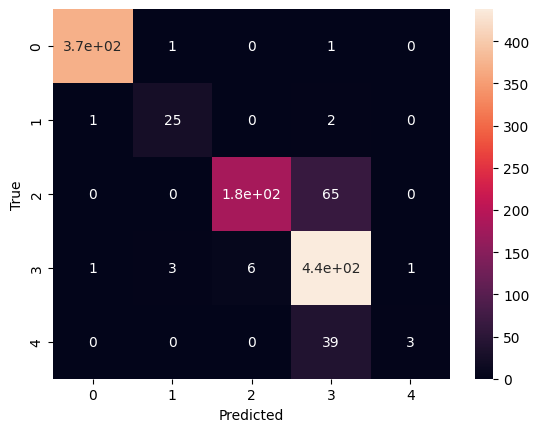

In [86]:
# fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test set
y_pred = rf.predict(X_test)
print(f'Test report: \n{classification_report(y_test, y_pred)}')

# save the model
joblib.dump(rf, MODELS_DIR + 'rf_base.gz')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()